# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and scipy.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the Titanic Dataset
Load the Titanic dataset from a CSV file using pandas.

In [2]:
# Load the Titanic Dataset
titanic_df = pd.read_csv('Titanic Dataset.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing
Handle missing values and encode categorical variables.

In [3]:
# Data Preprocessing
# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# Drop columns that won't be used for clustering
titanic_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the preprocessed dataset
titanic_df.head()

C:\Users\Jain\AppData\Local\Temp\ipykernel_1880\2167193966.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\Jain\AppData\Local\Temp\ipykernel_1880\2167193966.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


# Feature Selection
Select relevant features for clustering.

In [4]:
# Feature Selection
# Select relevant features for clustering
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = titanic_df[features]

# Display the first few rows of the selected features
X.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,34.5,7.8292,3,0,0,True,True,False
1,47.0,7.0000,3,1,0,False,False,True
2,62.0,9.6875,2,0,0,True,True,False
3,27.0,8.6625,3,0,0,True,False,True
4,22.0,12.2875,3,1,1,False,False,True


# Standardize the Data
Standardize the data using StandardScaler from sklearn.

In [5]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the standardized data
pd.DataFrame(X_scaled, columns=features).head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,0.386231,-0.497413,0.873482,-0.499470,-0.400248,0.755929,2.843757,-1.350676
1,1.371370,-0.512278,0.873482,0.616992,-0.400248,-1.322876,-0.351647,0.740370
2,2.553537,-0.464100,-0.315819,-0.499470,-0.400248,0.755929,2.843757,-1.350676
3,-0.204852,-0.482475,0.873482,-0.499470,-0.400248,0.755929,-0.351647,0.740370
4,-0.598908,-0.417492,0.873482,0.616992,0.619896,-1.322876,-0.351647,0.740370


# Hierarchical Clustering
Perform hierarchical clustering using scipy's linkage method.

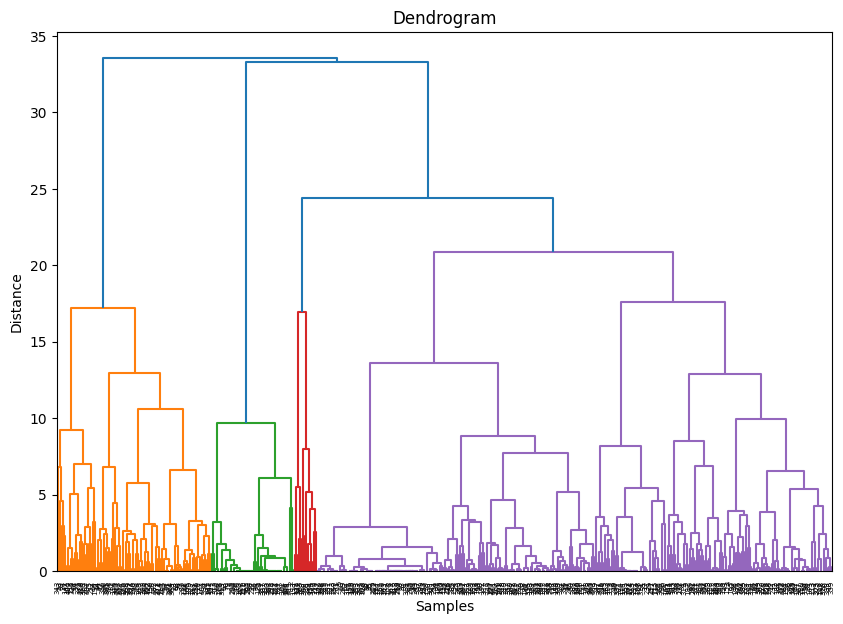

In [6]:
# Hierarchical Clustering
# Perform hierarchical clustering using scipy's linkage method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=50, color='r', linestyle='--')  # Add a reference line for the number of clusters
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine Optimal Number of Clusters using Elbow Method
Calculate the within-cluster sum of squares for different numbers of clusters.

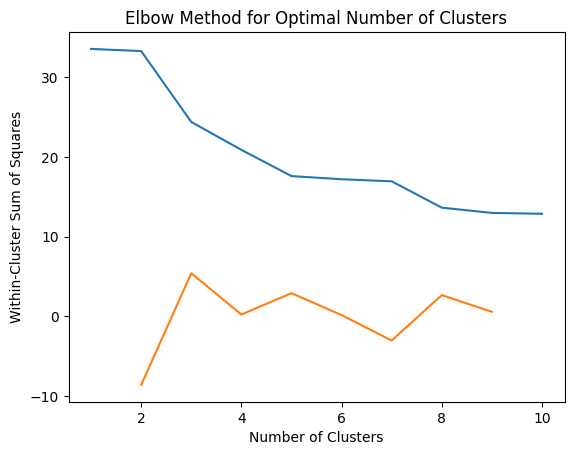

The optimal number of clusters is: 3


In [7]:
# Determine Optimal Number of Clusters using Elbow Method
from scipy.cluster.hierarchy import fcluster

# Calculate the within-cluster sum of squares for different numbers of clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)

plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

# Determine the optimal number of clusters
k = acceleration_rev.argmax() + 2
print(f'The optimal number of clusters is: {k}')

# Plot Dendrogram with Reference Line for Number of Clusters
Plot the dendrogram and add a reference line where the number of clusters is 5.

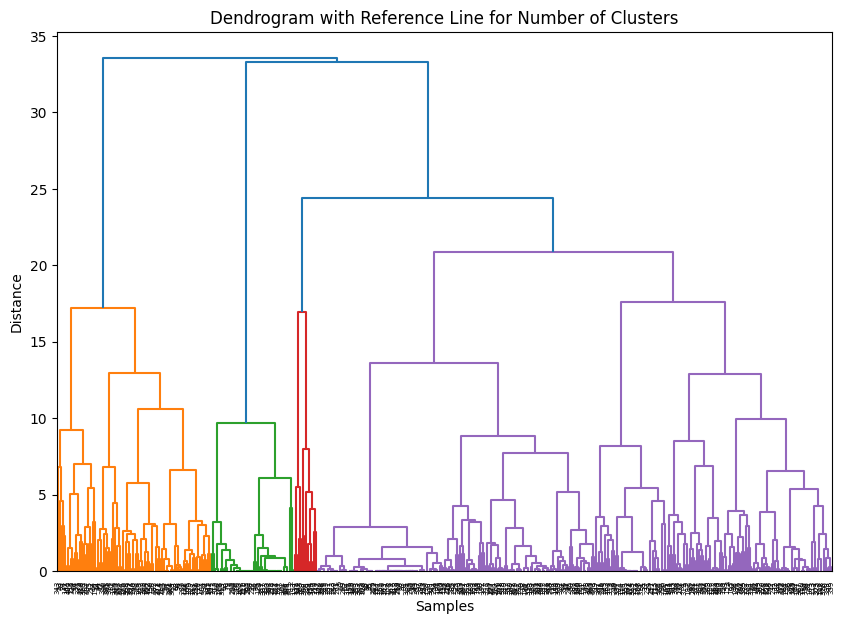

In [8]:
# Plot Dendrogram with Reference Line for Number of Clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=50, color='r', linestyle='--')  # Add a reference line for the number of clusters
plt.title('Dendrogram with Reference Line for Number of Clusters')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()